In [3]:
from urllib import request, error
#import a module with classes and functions which help opening URL's
from bs4 import BeautifulSoup as bs
#A library that makes webscraping easier

site1 = "https://worldpopulationreview.com/country-rankings/crime-rate-by-country"

response = bs(request.urlopen(site1),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("Crime.csv", "w") as file:
    file.write("..,Country,Crime index,Safety index")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [4]:
import pandas as pd

Crimedf = pd.read_csv("Crime.csv")
Crimedf.drop(columns=["..", "Safety index"], axis=1, inplace=True)
pd.to_numeric(Crimedf["Crime index"], errors="coerce")
Crimedf


,Country,Crime index
0,Venezuela,81.2
1,Papua New Guinea,79.7
2,Afghanistan,78.3
3,Haiti,77.9
4,South Africa,75.4
...,...,...
136,Oman,19.0
137,Taiwan,16.7
138,Qatar,16.0
139,United Arab Emirates,15.6


In [7]:
site2 = "https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country"

response = bs(request.urlopen(site2),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("Gini.csv", "w") as file:
    file.write("..,Country,Gini Coefficient,1,2,3")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [8]:
Ginidf = pd.read_csv("Gini.csv")
Ginidf.drop(columns=["..", "1", "2", "3"], axis=1, inplace=True)
Ginidf["Gini Coefficient"]=Ginidf["Gini Coefficient"].str.replace("%", '')
Ginidf["Gini Coefficient"]= pd.to_numeric(Ginidf["Gini Coefficient"], errors="coerce")
Ginidf


,Country,Gini Coefficient
0,South Africa,63.0
1,Namibia,59.1
2,Colombia,54.8
3,Eswatini,54.6
4,Botswana,53.3
...,...,...
229,Montserrat,NaN
230,Falkland Islands,NaN
231,Tokelau,NaN
232,Niue,NaN


In [11]:
site3 = "https://worldpopulationreview.com/country-rankings/hdi-by-country"

response = bs(request.urlopen(site3),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("HDI.csv", "w") as file:
    file.write("..,Country,HDI tier,HDI")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [12]:
HDIdf = pd.read_csv("HDI.csv")
HDIdf.drop(columns=["..", "HDI tier"], axis=1, inplace=True)
HDIdf

,Country,HDI
0,United States,0.927
1,Russia,0.821
2,Japan,0.920
3,Turkey,0.855
4,Germany,0.950
...,...,...
188,Saint Vincent and the Grenadines,0.772
189,Dominica,0.740
190,Marshall Islands,0.731
191,Palau,0.797


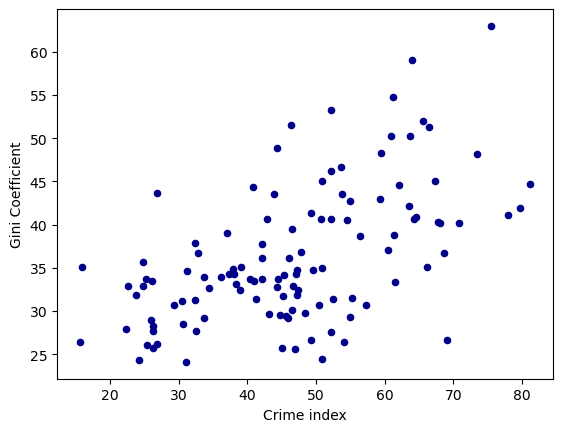

In [15]:
crimevsgini = pd.merge(Crimedf, Ginidf, on="Country",how="inner")
crimevsgini
scatter1 = crimevsgini.plot.scatter(x="Crime index", y="Gini Coefficient", c='DarkBlue')

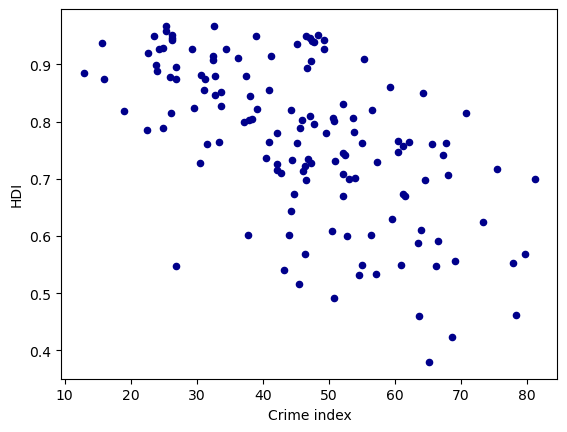

In [16]:
crimevsgini = pd.merge(Crimedf, HDIdf, on="Country")
crimevsgini
scatter2 = crimevsgini.plot.scatter(x="Crime index", y="HDI", c='DarkBlue')

In [17]:
import urllib.request
import shutil
import os
urllib.request.urlretrieve("https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv", "GiniUK.zip")
shutil.unpack_archive("GiniUK.zip")
os.rename("API_SI.POV.GINI_DS2_en_csv_v2_19376.csv", "GiniUK.csv")



FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'API_SI.POV.GINI_DS2_en_csv_v2_19376.csv' -> 'GiniUK.csv'

,Country Name,Year,Gini
81,United Kingdom,1960.0,NaN
347,United Kingdom,1961.0,NaN
613,United Kingdom,1962.0,NaN
879,United Kingdom,1963.0,NaN
1145,United Kingdom,1964.0,NaN
...,...,...,...
16307,United Kingdom,2021.0,32.4
16573,United Kingdom,2022.0,NaN
16839,United Kingdom,2023.0,NaN
17105,United Kingdom,2024.0,NaN


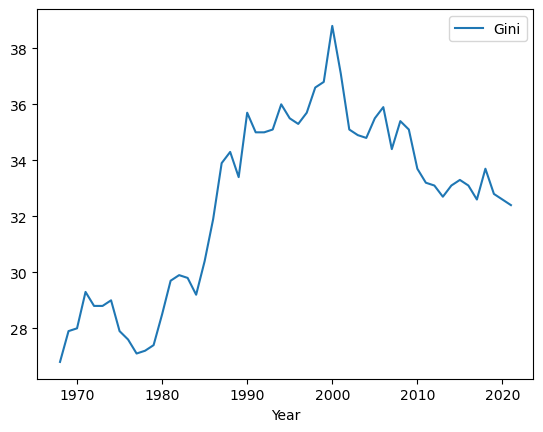

In [60]:
GiniUKdf = pd.read_csv("GiniUK.csv", header=2)
GiniUKdf = GiniUKdf.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
GiniUKdf = pd.melt(GiniUKdf, id_vars=["Country Name"], var_name="Year", value_name="Gini")
GiniUKdf = GiniUKdf[GiniUKdf["Country Name"] == "United Kingdom"]
GiniUKdf[["Gini", "Year"]] = GiniUKdf[["Gini", "Year"]].apply(lambda col: pd.to_numeric(col, errors="coerce"))
lines = GiniUKdf.plot.line(x="Year", y="Gini")
GiniUKdf

In [22]:
import urllib.request

url = "https://www.ons.gov.uk/generator?uri=/peoplepopulationandcommunity/crimeandjustice/bulletins/crimeinenglandandwales/yearendingseptember2024/6580d8c7&format=csv"
filename = "CrimeUK.csv"

req = urllib.request.Request(
    url,
    headers={'User-Agent': 'Mozilla/5.0'}
)

with urllib.request.urlopen(req) as response:
    with open(filename, 'wb') as out_file:
        out_file.write(response.read())

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ronni\AppData\Local\Temp\ipykernel_7900\471631288.py:4: SyntaxWarning: invalid escape sequence '\d'
  CrimeUKdf["Year"] = CrimeUKdf["Year"].str.extract("(\d+)", expand=False)


,Year,Crime
0,1981,11303.0
2,1983,12128.0
6,1987,13647.0
10,1991,15564.0
12,1993,18835.0
14,1995,19786.0
16,1997,17168.0
18,1999,15247.0
21,2002,12771.0
22,2003,12390.0


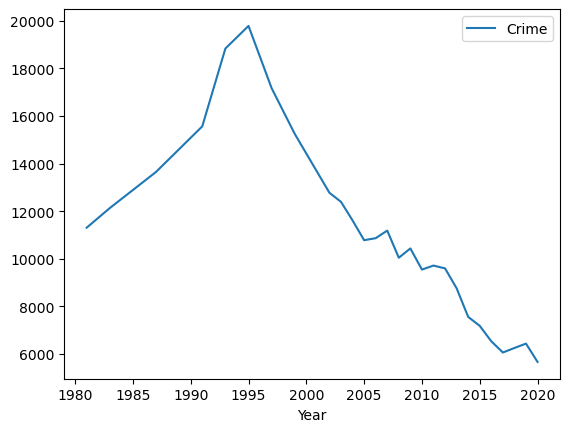

In [90]:
CrimeUKdf = pd.read_csv("CrimeUK.csv", header = 6)
CrimeUKdf.drop(columns=["CSEW estimate including fraud and computer misuse", "CSEW headline estimates excluding fraud and computer misuse - YE September ", "CSEW headline estimates including fraud and computer misuse - YE September"], axis=1, inplace=True)
CrimeUKdf.rename(columns={"CSEW estimates excluding fraud and computer misuse": "Crime", "Unnamed: 0": "Year"}, inplace=True)
CrimeUKdf["Year"] = CrimeUKdf["Year"].str.extract("(\d+)", expand=False)
CrimeUKdf["Year"] = pd.to_numeric(CrimeUKdf["Year"], errors="coerce")
CrimeUKdf["Crime"] = pd.to_numeric(CrimeUKdf["Crime"], errors="coerce")
CrimeUKdf.dropna(subset=["Crime"], inplace=True)
#CrimeUKdf["Year"] = CrimeUKdf["Year"].astype(int)
lines = CrimeUKdf.plot.line(x="Year", y="Crime")
CrimeUKdf


,Year,Crime,Country Name,Gini
0,1981,11303.0,United Kingdom,29.7
1,1983,12128.0,United Kingdom,29.8
2,1987,13647.0,United Kingdom,33.9
3,1991,15564.0,United Kingdom,35.0
4,1993,18835.0,United Kingdom,35.1
5,1995,19786.0,United Kingdom,35.5
6,1997,17168.0,United Kingdom,35.7
7,1999,15247.0,United Kingdom,36.8
8,2002,12771.0,United Kingdom,35.1
9,2003,12390.0,United Kingdom,34.9


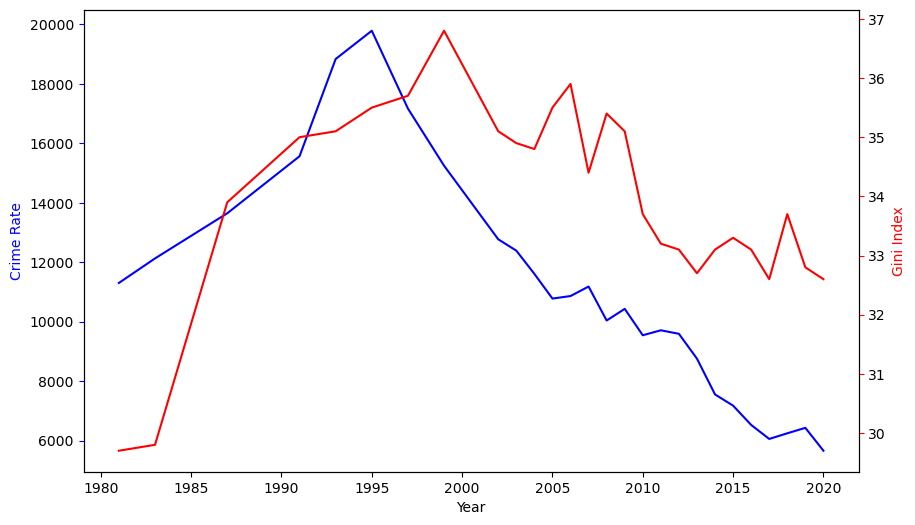

In [201]:
import matplotlib.pyplot as plt

crimeginiuk = pd.merge(CrimeUKdf, GiniUKdf, on="Year")

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Crime Rate", color = "blue")
ax1.plot(crimeginiuk["Year"], crimeginiuk["Crime"], color = "blue", label = "Crime")
ax1.tick_params(axis="y", color = "blue")

ax2 = ax1.twinx()

ax2.set_ylabel("Gini Index", color = "red")
ax2.plot(crimeginiuk["Year"], crimeginiuk["Gini"], color = "red", label="Gini Index")
ax2.tick_params(axis="y", color = "red")
crimeginiuk


In [104]:
site6 = "https://countryeconomy.com/hdi/uk"

response = bs(request.urlopen(site6),"html.parser")
TAB = response.find("table", class_="table tabledat table-striped table-condensed table-hover")

rows = TAB.find_all("tr")

with open("HDIUK.csv", "w") as file:
    file.write("Year, HDI, Rank")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

,Year,HDI
0,2022,0.940
1,2021,0.931
2,2020,0.920
3,2019,0.933
4,2018,0.928
5,2017,0.929
6,2016,0.926
7,2015,0.923
8,2014,0.924
9,2013,0.923


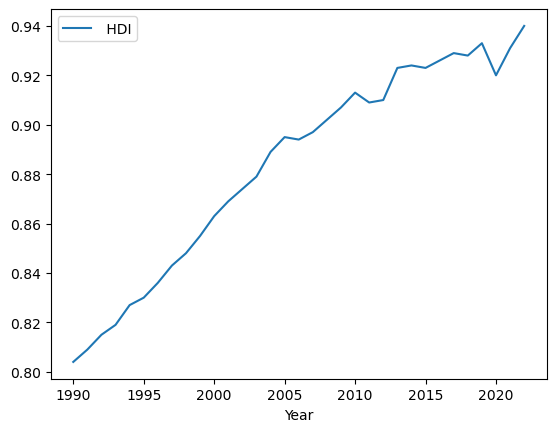

In [209]:
HDIUKdf = pd.read_csv("HDIUK.csv", encoding_errors="replace")
HDIUKdf.drop(columns=[" Rank"], axis=1, inplace=True)
#pd.to_numeric(HDIUKdf["Crime index"], errors="coerce")
HDIUKdf
lines = HDIUKdf.plot.line(x="Year", y=" HDI")
HDIUKdf

,Year,Crime,HDI
0,1991,15564.0,0.809
1,1993,18835.0,0.819
2,1995,19786.0,0.830
3,1997,17168.0,0.843
4,1999,15247.0,0.855
5,2002,12771.0,0.874
6,2003,12390.0,0.879
7,2004,11609.0,0.889
8,2005,10778.0,0.895
9,2006,10863.0,0.894


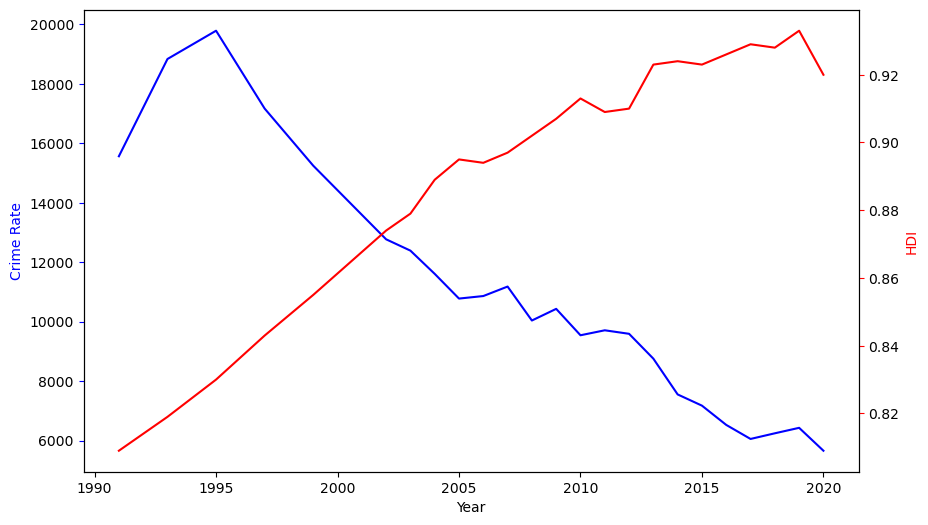

In [223]:

crimehdiuk = pd.merge(CrimeUKdf, HDIUKdf, on="Year")
crimehdiuk
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Crime Rate", color = "blue")
ax1.plot(crimehdiuk["Year"], crimehdiuk["Crime"], color = "blue", label = "Crime")
ax1.tick_params(axis="y", color = "blue")

ax2 = ax1.twinx()

ax2.set_ylabel("HDI", color = "red")
ax2.plot(crimehdiuk["Year"], crimehdiuk[" HDI"], color = "red", label="HDI")
ax2.tick_params(axis="y", color = "red")
crimehdiuk
crimehdiuk

In [147]:
site7 = "https://tradingeconomics.com/country-list/gdp-per-capita?continent=world"

req = urllib.request.Request(
    site7,
    headers={'User-Agent': 'Mozilla/5.0'}
)

response = bs(request.urlopen(req),"html.parser")
TAB = response.find("table", class_="table table-hover table-heatmap")

rows = TAB.find_all("tr")

with open("GDP.csv", "w") as file:
    file.write("Country,GDPc,GDPp,Date,Currency")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

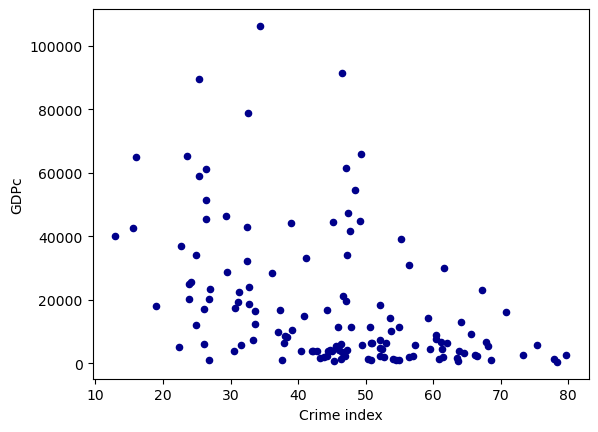

In [148]:
GDPdf = pd.read_csv("GDP.csv", encoding_errors="replace")
GDPdf.drop(columns=["GDPp", "Date", "Currency"], axis=1, inplace=True)
#pd.to_numeric(HDIUKdf["Crime index"], errors="coerce")
GDPdf
GDPvsCrime = pd.merge(Crimedf, GDPdf, on="Country",how="inner")
GDPvsCrime
scatter1 = GDPvsCrime.plot.scatter(x="Crime index", y="GDPc", c='DarkBlue')
#lines = HDIUKdf.plot.line(x="Year", y="HDI")

In [155]:
urllib.request.urlretrieve("https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv", "GDPUK.zip")
shutil.unpack_archive("GDPUK.zip")


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_19346.csv' -> 'GiniUK.csv'

In [159]:
os.rename("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_19346.csv", "GDPUK.csv")

,Country Name,Year,GDP Per Capita
81,United Kingdom,1960.0,1397.594803
347,United Kingdom,1961.0,1472.385714
613,United Kingdom,1962.0,1525.775853
879,United Kingdom,1963.0,1613.456884
1145,United Kingdom,1964.0,1748.288118
...,...,...,...
16307,United Kingdom,2021.0,46896.866243
16573,United Kingdom,2022.0,45935.927647
16839,United Kingdom,2023.0,49463.855462
17105,United Kingdom,2024.0,NaN


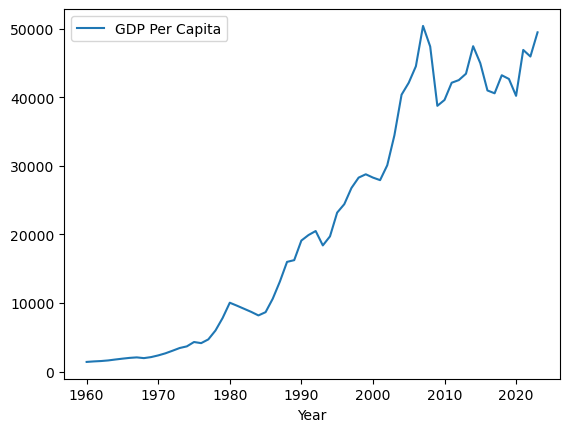

In [229]:
GDPUKdf = pd.read_csv("GDPUK.csv", header=2)
GDPUKdf = GDPUKdf.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
GDPUKdf = pd.melt(GDPUKdf, id_vars=["Country Name"], var_name="Year", value_name="GDP Per Capita")
GDPUKdf = GDPUKdf[GDPUKdf["Country Name"] == "United Kingdom"]
GDPUKdf["Year"] = GDPUKdf["Year"].apply(lambda col: pd.to_numeric(col, errors="coerce"))
lines = GDPUKdf.plot.line(x="Year", y="GDP Per Capita")
GDPUKdf

,Year,Crime,HDI
0,1991,15564.0,0.809
1,1993,18835.0,0.819
2,1995,19786.0,0.830
3,1997,17168.0,0.843
4,1999,15247.0,0.855
5,2002,12771.0,0.874
6,2003,12390.0,0.879
7,2004,11609.0,0.889
8,2005,10778.0,0.895
9,2006,10863.0,0.894


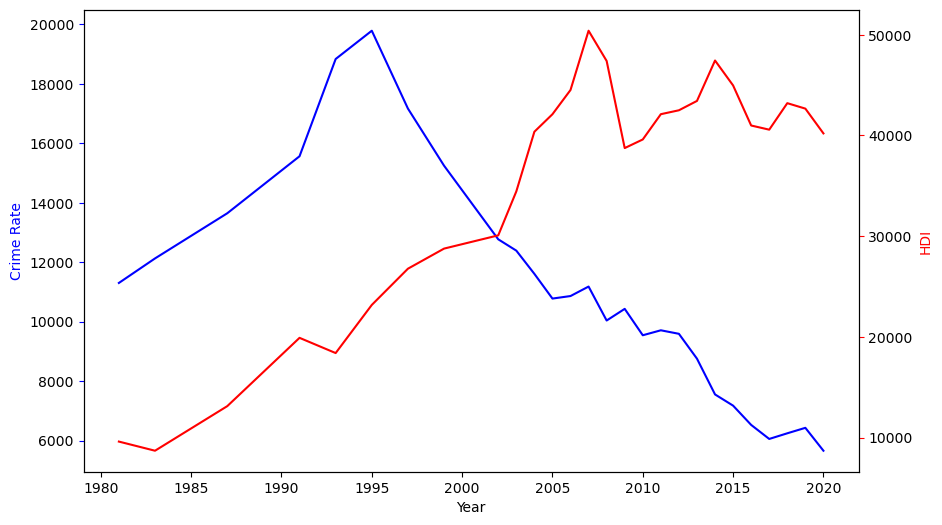

In [234]:
crimegdpuk = pd.merge(CrimeUKdf, GDPUKdf, on="Year")
crimegdpuk
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Crime Rate", color = "blue")
ax1.plot(crimegdpuk["Year"], crimegdpuk["Crime"], color = "blue", label = "Crime")
ax1.tick_params(axis="y", color = "blue")

ax2 = ax1.twinx()

ax2.set_ylabel("GDP", color = "red")
ax2.plot(crimegdpuk["Year"], crimegdpuk["GDP Per Capita"], color = "red", label="GDP")
ax2.tick_params(axis="y", color = "red")
crimehdiuk
crimehdiuk